In [14]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

plt.style.use('bmh')

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
ticker='MSFT'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d' # 1d, 1m
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df = pd.read_csv(query_string)

In [16]:
df['symbol']='MSFT'
df.index=pd.to_datetime(df['Date'])
df=df.drop(['Date'],axis='columns')
df
#df.to_csv('DIS.csv')

,Open,High,Low,Close,Adj Close,Volume,symbol
Date,,,,,,,
2015-01-02,94.910004,95.279999,92.849998,93.750000,87.376282,5865400,DIS
2015-01-05,93.279999,93.349998,91.779999,92.379997,86.099396,7789400,DIS
2015-01-06,92.570000,93.190002,91.160004,91.889999,85.642708,6793100,DIS
2015-01-07,92.720001,93.150002,92.099998,92.830002,86.518814,6589500,DIS
2015-01-08,93.870003,94.300003,93.559998,93.790001,87.413544,7579400,DIS
...,...,...,...,...,...,...,...
2022-07-18,96.360001,97.269997,95.309998,95.699997,95.699997,10430400,DIS
2022-07-19,96.680000,99.849998,96.680000,99.610001,99.610001,13683400,DIS
2022-07-20,100.250000,104.260002,99.949997,103.349998,103.349998,15112700,DIS


In [17]:
df=df[['Close']]
df

,Close
Date,
2015-01-02,93.750000
2015-01-05,92.379997
2015-01-06,91.889999
2015-01-07,92.830002
2015-01-08,93.790001
...,...
2022-07-18,95.699997
2022-07-19,99.610001
2022-07-20,103.349998


In [18]:
#Create a variable to predict 'x' days out the future
future_days=100
#Create a new column (target) shifted 'x' units/dayys up
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

C:\Users\User\AppData\Local\Temp\ipykernel_8124\262358512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Close']].shift(-future_days)


,Close,Prediction
Date,,
2022-07-19,99.610001,NaN
2022-07-20,103.349998,NaN
2022-07-21,104.180000,NaN
2022-07-22,102.720001,NaN


In [19]:

X= np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 93.75    ]
 [ 92.379997]
 [ 91.889999]
 ...
 [149.399994]
 [149.529999]
 [148.460007]]


C:\Users\User\AppData\Local\Temp\ipykernel_8124\1685478171.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= np.array(df.drop(['Prediction'],1))[:-future_days]


In [20]:

y = np.array(df['Prediction'])[:-future_days]
print(y)

[110.529999 110.370003 110.959999 ... 103.349998 104.18     102.720001]


In [21]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [22]:
svr = SVR().fit(x_train,y_train)

In [23]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\User\AppData\Local\Temp\ipykernel_8124\2647039038.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'],1)[:-future_days]


array([[175.479996],
       [177.710007],
       [176.740005],
       [173.520004],
       [173.130005],
       [172.960007],
       [174.410004],
       [176.460007],
       [171.139999],
       [171.179993],
       [170.550003],
       [171.339996],
       [169.419998],
       [172.009995],
       [172.039993],
       [169.550003],
       [169.679993],
       [169.070007],
       [170.190002],
       [169.830002],
       [170.080002],
       [170.279999],
       [175.630005],
       [176.869995],
       [175.110001],
       [174.449997],
       [162.110001],
       [159.630005],
       [158.429993],
       [158.830002],
       [157.330002],
       [155.580002],
       [154.      ],
       [154.160004],
       [151.029999],
       [151.339996],
       [148.110001],
       [147.809998],
       [144.899994],
       [142.149994],
       [147.199997],
       [146.220001],
       [150.369995],
       [150.809998],
       [153.339996],
       [152.940002],
       [152.710007],
       [150.4

In [24]:
svr_prediction = svr.predict(x_future)
print(svr_prediction)

[154.93300827 159.01010915 157.28168035 151.10122027 150.3200881
 149.97820279 152.86331809 156.76919769 146.28521416 146.36667789
 145.08399144 146.69257278 142.79448877 148.05579663 148.11673481
 143.0566396  143.31915757 142.09096858 144.35235705 143.6225562
 144.12913644 144.53511408 155.21807396 157.51762257 154.22425148
 152.94171935 129.65613326 126.41055163 125.13774175 125.53939003
 124.15251464 122.95205161 122.25622752 122.31013916 121.90089366
 121.88321168 122.61166532 122.73405444 124.27235339 126.07577786
 123.00681535 123.50526131 121.97796695 121.92070268 122.07256979
 121.99119742 121.95447193 121.96879511 122.26811746 121.97332782
 122.37854569 122.37522031 123.37163658 121.89938934 121.88170297
 122.1456339  121.96797403 122.75126695 122.59416015 123.15586168
 122.60322825 123.71173911 123.03717745 122.74627334 123.81555422
 124.57849521 123.59665041 124.63206677 124.55190581 122.87559907
 121.88387765 121.90436722 122.02258992 122.81566612 129.01044305
 128.9704569

In [25]:
rms=np.sqrt(np.mean(np.power((x_future-svr_prediction),2)))
rms

30.301550640381727

C:\Users\User\AppData\Local\Temp\ipykernel_8124\1842221499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


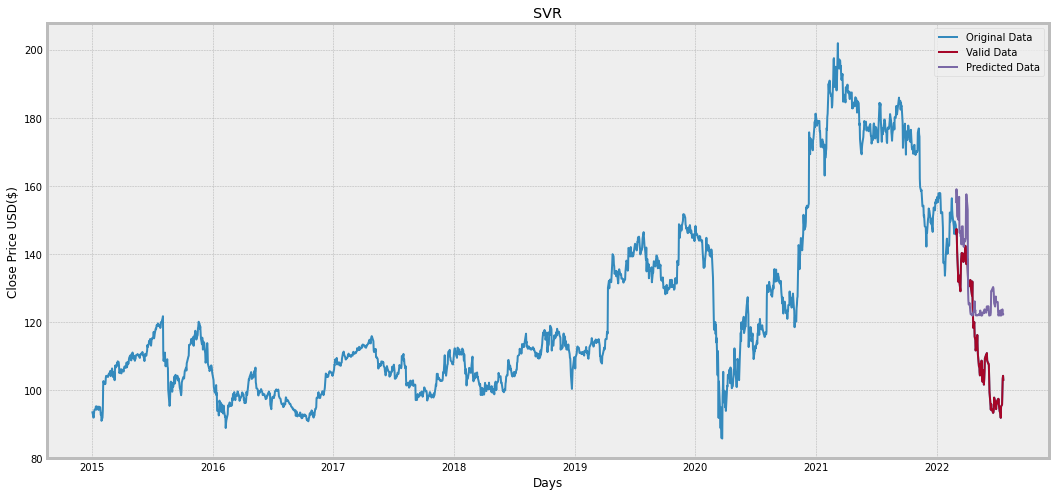

In [26]:
# Visualize the data
predictions = svr_prediction

valid = df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('SVR')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Original Data','Valid Data', 'Predicted Data'])
plt.show()